# Analysis of YouTube Comments to Boston Dynamics' Dance Video

Comments retrieved from: https://youtu.be/fn3KWM1kuAw?si=31gr_7QdDarJ5flX

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load the dataset

In [2]:
data = pd.read_csv('dataBD_subset.csv')

In [3]:
data

,comment_no.,updated_at,like_count,text,video_id,public,humanization,performance,autonomy,positive,neutral,negative
0,1,2023-04-28T17:41:58Z,7,cgi,fn3KWM1kuAw,True,0,0,0,0,1,0
1,2,2023-04-28T04:52:32Z,6,"""All this has happened before,""\n\n""But the qu...",fn3KWM1kuAw,True,0,0,0,0,1,0
2,3,2023-04-28T01:03:24Z,11,These robots can dance while I look like a pig...,fn3KWM1kuAw,True,0,1,0,0,1,0
3,4,2023-04-27T06:40:19Z,13,"Donâ€™t fall for the dancing, these same robot...",fn3KWM1kuAw,True,1,0,1,0,0,1
4,5,2023-04-27T06:39:31Z,12,This is terrifying! These same robots that you...,fn3KWM1kuAw,True,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-07-16T22:46:13Z,3,Cool video!,fn3KWM1kuAw,True,0,0,0,1,0,0
996,997,2023-07-16T21:34:46Z,2,This So Greats ü§©üòâ They were NSync also...,fn3KWM1kuAw,True,0,0,0,1,0,0
997,998,2023-07-16T19:05:33Z,4,Love it! Now those are some happy bots.,fn3KWM1kuAw,True,1,0,0,1,0,0
998,999,2023-07-16T17:28:26Z,3,I too remember these happy times before our en...,fn3KWM1kuAw,True,1,1,1,0,0,1


## Preprocessing

### Merge overestimation labels (binary)

In [4]:
# aggregated column "overestimation":
# all comments, that were labeled as 'humanization', 'performance' or 'autonomy'

conditions = [
    (data['humanization'] == 1),
    (data['performance'] == 1),
    (data['autonomy'] == 1),
    (data['humanization'] == 0) & (data['performance'] == 0) & (data['autonomy'] == 0)
]

values = [1,1,1,0]

data['overestimation_bin'] = np.select(conditions, values)

### Merge overestimation labels (combinations)

In [5]:
conditions = [
    (data['humanization'] == 1) & (data['performance'] == 1) & (data['autonomy'] == 1),
    (data['humanization'] == 1) & (data['performance'] == 1) & (data['autonomy'] == 0),
    (data['humanization'] == 1) & (data['performance'] == 0) & (data['autonomy'] == 1),
    (data['humanization'] == 0) & (data['performance'] == 1) & (data['autonomy'] == 1),
    (data['humanization'] == 1) & (data['performance'] == 0) & (data['autonomy'] == 0),
    (data['humanization'] == 0) & (data['performance'] == 1) & (data['autonomy'] == 0),
    (data['humanization'] == 0) & (data['performance'] == 0) & (data['autonomy'] == 1)
]

values = ['human_perform_auto', 'human_perform', 'human_auto', 'perform_auto', 'human', 'perform', 'auto']

data['overestimation_comb'] = np.select(conditions, values)

### Merge sentiment lables

In [6]:
conditions = [
    (data['positive'] == 1) & (data['negative'] == 0),
    (data['positive'] == 0) & (data['negative'] == 1),
    (data['neutral'] == 1),
    (data['positive'] == 1) & (data['negative'] == 1)
]

values = ['pos', 'neg', 'neut', 'pos_neg']

data['sentiment'] = np.select(conditions, values)

In [7]:
data

,comment_no.,updated_at,like_count,text,video_id,public,humanization,performance,autonomy,positive,neutral,negative,overestimation_bin,overestimation_comb,sentiment
0,1,2023-04-28T17:41:58Z,7,cgi,fn3KWM1kuAw,True,0,0,0,0,1,0,0,0,neut
1,2,2023-04-28T04:52:32Z,6,"""All this has happened before,""\n\n""But the qu...",fn3KWM1kuAw,True,0,0,0,0,1,0,0,0,neut
2,3,2023-04-28T01:03:24Z,11,These robots can dance while I look like a pig...,fn3KWM1kuAw,True,0,1,0,0,1,0,1,perform,neut
3,4,2023-04-27T06:40:19Z,13,"Donâ€™t fall for the dancing, these same robot...",fn3KWM1kuAw,True,1,0,1,0,0,1,1,human_auto,neg
4,5,2023-04-27T06:39:31Z,12,This is terrifying! These same robots that you...,fn3KWM1kuAw,True,1,0,1,0,0,1,1,human_auto,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-07-16T22:46:13Z,3,Cool video!,fn3KWM1kuAw,True,0,0,0,1,0,0,0,0,pos
996,997,2023-07-16T21:34:46Z,2,This So Greats ü§©üòâ They were NSync also...,fn3KWM1kuAw,True,0,0,0,1,0,0,0,0,pos
997,998,2023-07-16T19:05:33Z,4,Love it! Now those are some happy bots.,fn3KWM1kuAw,True,1,0,0,1,0,0,1,human,pos
998,999,2023-07-16T17:28:26Z,3,I too remember these happy times before our en...,fn3KWM1kuAw,True,1,1,1,0,0,1,1,human_perform_auto,neg


### Drop comments which were not labeled

In [8]:
# leave out all comments that were not labeled (keep only those comments which have at least 1 label)
df = data[(data.overestimation_bin == 1)|(data.positive == 1)|(data.negative == 1)|(data.neutral == 1)]

In [9]:
df

,comment_no.,updated_at,like_count,text,video_id,public,humanization,performance,autonomy,positive,neutral,negative,overestimation_bin,overestimation_comb,sentiment
0,1,2023-04-28T17:41:58Z,7,cgi,fn3KWM1kuAw,True,0,0,0,0,1,0,0,0,neut
1,2,2023-04-28T04:52:32Z,6,"""All this has happened before,""\n\n""But the qu...",fn3KWM1kuAw,True,0,0,0,0,1,0,0,0,neut
2,3,2023-04-28T01:03:24Z,11,These robots can dance while I look like a pig...,fn3KWM1kuAw,True,0,1,0,0,1,0,1,perform,neut
3,4,2023-04-27T06:40:19Z,13,"Donâ€™t fall for the dancing, these same robot...",fn3KWM1kuAw,True,1,0,1,0,0,1,1,human_auto,neg
4,5,2023-04-27T06:39:31Z,12,This is terrifying! These same robots that you...,fn3KWM1kuAw,True,1,0,1,0,0,1,1,human_auto,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-07-16T22:46:13Z,3,Cool video!,fn3KWM1kuAw,True,0,0,0,1,0,0,0,0,pos
996,997,2023-07-16T21:34:46Z,2,This So Greats ü§©üòâ They were NSync also...,fn3KWM1kuAw,True,0,0,0,1,0,0,0,0,pos
997,998,2023-07-16T19:05:33Z,4,Love it! Now those are some happy bots.,fn3KWM1kuAw,True,1,0,0,1,0,0,1,human,pos
998,999,2023-07-16T17:28:26Z,3,I too remember these happy times before our en...,fn3KWM1kuAw,True,1,1,1,0,0,1,1,human_perform_auto,neg


## Analysis

### Distribution of comments per label

In [10]:
# sum of columns
df.sum(axis=0)

comment_no.                                                       355228
updated_at             2023-04-28T17:41:58Z2023-04-28T04:52:32Z2023-0...
like_count                                                          4477
text                   cgi"All this has happened before,"\n\n"But the...
video_id               fn3KWM1kuAwfn3KWM1kuAwfn3KWM1kuAwfn3KWM1kuAwfn...
public                                                               719
humanization                                                         125
performance                                                           95
autonomy                                                             156
positive                                                             253
neutral                                                              266
negative                                                             216
overestimation_bin                                                   228
overestimation_comb    00performhuman_autohuman_aut

|Label             |Sum|
|------------------|---|
|humanization      |125|
|performance       |95 |
|autonomy          |156|
|positive          |253|
|neutral           |266|
|negative          |216|
|overestimation    |228|

### Correlation of labels

In [11]:
df2 = df[['humanization','performance','autonomy', 'positive', 'neutral', 'negative']].copy()

In [12]:
df2

,humanization,performance,autonomy,positive,neutral,negative
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,1,0
3,1,0,1,0,0,1
4,1,0,1,0,0,1
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,0,1,0,0
997,1,0,0,1,0,0
998,1,1,1,0,0,1


In [13]:
# calculate correlation matrix
Var_Corr = df2.corr()
print(Var_Corr)

              humanization  performance  autonomy  positive   neutral  \
humanization      1.000000     0.243669  0.408487 -0.176631 -0.077874   
performance       0.243669     1.000000  0.442307 -0.063887 -0.103328   
autonomy          0.408487     0.442307  1.000000 -0.218282 -0.291541   
positive         -0.176631    -0.063887 -0.218282  1.000000 -0.564624   
neutral          -0.077874    -0.103328 -0.291541 -0.564624  1.000000   
negative          0.267755     0.174347  0.538302 -0.381203 -0.502151   

              negative  
humanization  0.267755  
performance   0.174347  
autonomy      0.538302  
positive     -0.381203  
neutral      -0.502151  
negative      1.000000  


<AxesSubplot:>

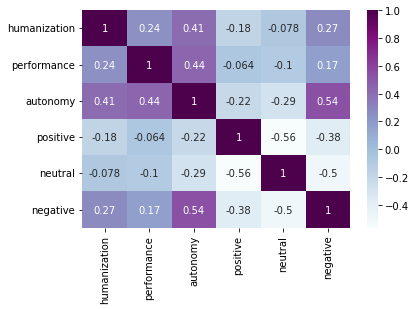

In [14]:
# plot heatmap
sns.heatmap(Var_Corr, cmap="BuPu", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

### Co-occurrence of labels

#### Co-occurrence negative - overestimation

In [15]:
# co-occurrence matrix overestimation labels - negative
comat_overestimation_neg = pd.crosstab(df.overestimation_comb, df.negative)
comat_overestimation_neg

negative,0,1
overestimation_comb,,
0,408,83
auto,7,40
human,35,7
human_auto,6,38
human_perform,10,0
human_perform_auto,3,26
perform,14,6
perform_auto,20,16


In [16]:
# co-occurrence matrix overestimation labels - negative rounded percentages
comat_overestimation_neg2 = pd.crosstab(df.overestimation_comb, df.negative, normalize='index')
cm_o_n_rounded = comat_overestimation_neg2.round(2)
cm_o_n_rounded

negative,0,1
overestimation_comb,,
0,0.83,0.17
auto,0.15,0.85
human,0.83,0.17
human_auto,0.14,0.86
human_perform,1.00,0.00
human_perform_auto,0.10,0.90
perform,0.70,0.30
perform_auto,0.56,0.44


<AxesSubplot:xlabel='negative', ylabel='overestimation_comb'>

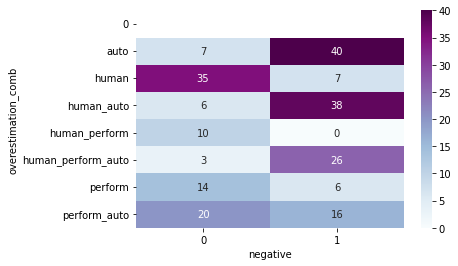

In [17]:
# heatmap co-occurrence overestimation - negative
mask = np.zeros((8,2))
mask[0,:] = True
sns.heatmap(comat_overestimation_neg, cmap="BuPu", annot=True, mask=mask)

In [18]:
# co-occurrence matrix overestimation - negative
comat_neg1 = pd.crosstab(df.overestimation_bin, df.negative)
comat_neg1

negative,0,1
overestimation_bin,,
0,408,83
1,95,133


In [19]:
# co-occurrence matrix overestimation - negative rounded percentages
comat_neg = pd.crosstab(df.overestimation_bin, df.negative, normalize='index')
comat_neg_rounded = comat_neg.round(2)
comat_neg_rounded

negative,0,1
overestimation_bin,,
0,0.83,0.17
1,0.42,0.58


#### Co-occurrence positive - overestimation

In [20]:
# co-occurrence matrix overestimation labels - positive
comat_overestimation_pos = pd.crosstab(df.overestimation_comb, df.positive)
comat_overestimation_pos

positive,0,1
overestimation_comb,,
0,283,208
auto,43,4
human,31,11
human_auto,40,4
human_perform,6,4
human_perform_auto,27,2
perform,14,6
perform_auto,22,14


In [21]:
# co-occurrence matrix overestimation labels - positive rounded percentages
comat_overestimation_pos2 = pd.crosstab(df.overestimation_comb, df.positive, normalize='index')
cm_o_p_rounded = comat_overestimation_pos2.round(2)
cm_o_p_rounded

positive,0,1
overestimation_comb,,
0,0.58,0.42
auto,0.91,0.09
human,0.74,0.26
human_auto,0.91,0.09
human_perform,0.60,0.40
human_perform_auto,0.93,0.07
perform,0.70,0.30
perform_auto,0.61,0.39


<AxesSubplot:xlabel='positive', ylabel='overestimation_comb'>

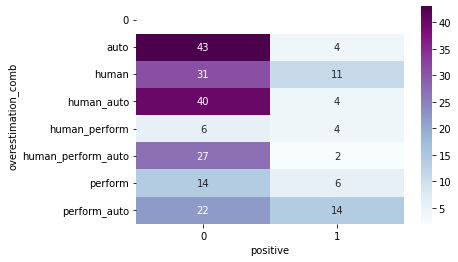

In [22]:
# heatmap co-occurrence overestimation - positive
mask = np.zeros((8,2))
mask[0,:] = True
sns.heatmap(comat_overestimation_pos, cmap="BuPu", annot=True, mask=mask)

In [23]:
# co-occurrence matrix overestimation - positive
comat_pos1 = pd.crosstab(df.overestimation_bin, df.positive)
comat_pos1

positive,0,1
overestimation_bin,,
0,283,208
1,183,45


In [24]:
# co-occurrence matrix overestimation - positive rounded percentages
comat_pos = pd.crosstab(df.overestimation_bin, df.positive, normalize='index')
comat_pos_rounded = comat_pos.round(2)
comat_pos_rounded

positive,0,1
overestimation_bin,,
0,0.58,0.42
1,0.80,0.20


#### Co-occurrence neutral - overestimation

In [25]:
# co-occurrence matrix overestimation labels - neutral
comat_overestimation_neut = pd.crosstab(df.overestimation_comb, df.neutral)
comat_overestimation_neut

neutral,0,1
overestimation_comb,,
0,279,212
auto,44,3
human,18,24
human_auto,40,4
human_perform,4,6
human_perform_auto,27,2
perform,12,8
perform_auto,29,7


In [26]:
# co-occurrence matrix overestimation labels - neutral rounded percentages
comat_overestimation_neut2 = pd.crosstab(df.overestimation_comb, df.neutral, normalize='index')
cm_o_ne_rounded = comat_overestimation_neut2.round(2)
cm_o_ne_rounded

neutral,0,1
overestimation_comb,,
0,0.57,0.43
auto,0.94,0.06
human,0.43,0.57
human_auto,0.91,0.09
human_perform,0.40,0.60
human_perform_auto,0.93,0.07
perform,0.60,0.40
perform_auto,0.81,0.19


<AxesSubplot:xlabel='neutral', ylabel='overestimation_comb'>

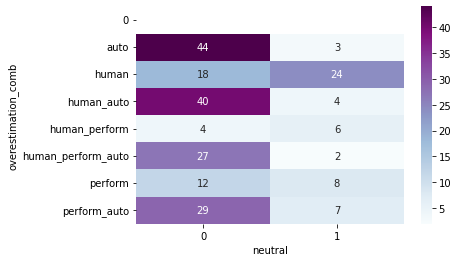

In [27]:
# heatmap co-occurrence overestimation - neutral
mask = np.zeros((8,2))
mask[0,:] = True
sns.heatmap(comat_overestimation_neut, cmap="BuPu", annot=True, mask=mask)

In [28]:
# co-occurrence matrix overestimation - neutral
comat_neut1 = pd.crosstab(df.overestimation_bin, df.neutral)
comat_neut1

neutral,0,1
overestimation_bin,,
0,279,212
1,174,54


In [29]:
# co-occurrence matrix overestimation - neutral rounded percentages
comat_neut = pd.crosstab(df.overestimation_bin, df.neutral, normalize='index')
comat_neut_rounded = comat_neut.round(2)
comat_neut_rounded

neutral,0,1
overestimation_bin,,
0,0.57,0.43
1,0.76,0.24


#### Co-occurrence all sentiments - overestimation

In [30]:
# co-occurrence matrix overestimation labels - sentiment
co_mat_overestimation2_sentiment = pd.crosstab(df.overestimation_comb, df.sentiment)
co_mat_overestimation2_sentiment

sentiment,neg,neut,pos,pos_neg
overestimation_comb,,,,
0,71,212,196,12
auto,40,3,4,0
human,7,24,11,0
human_auto,36,4,2,2
human_perform,0,6,4,0
human_perform_auto,25,2,1,1
perform,6,8,6,0
perform_auto,15,7,13,1


In [31]:
# co-occurrence matrix overestimation labels - sentiment rounded percentages
comat_overestimation_sentiment = pd.crosstab(df.overestimation_comb, df.sentiment, normalize='index')
cm_rounded = comat_overestimation_sentiment.round(2)
cm_rounded

sentiment,neg,neut,pos,pos_neg
overestimation_comb,,,,
0,0.14,0.43,0.40,0.02
auto,0.85,0.06,0.09,0.00
human,0.17,0.57,0.26,0.00
human_auto,0.82,0.09,0.05,0.05
human_perform,0.00,0.60,0.40,0.00
human_perform_auto,0.86,0.07,0.03,0.03
perform,0.30,0.40,0.30,0.00
perform_auto,0.42,0.19,0.36,0.03


<AxesSubplot:xlabel='sentiment', ylabel='overestimation_comb'>

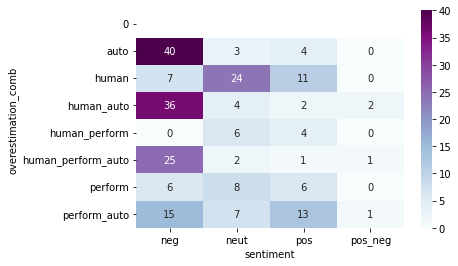

In [32]:
# heatmap co-occurrence overestimation - sentiment
mask = np.zeros((8,4))
mask[0,:] = True
sns.heatmap(co_mat_overestimation2_sentiment, cmap="BuPu", annot=True, mask=mask)

In [33]:
# co-occurrence matrix overestimation - sentiment
comat_overestimation_sentiment1 = pd.crosstab(df.overestimation_bin, df.sentiment)
comat_overestimation_sentiment1

sentiment,neg,neut,pos,pos_neg
overestimation_bin,,,,
0,71,212,196,12
1,129,54,41,4


<AxesSubplot:xlabel='sentiment', ylabel='overestimation_bin'>

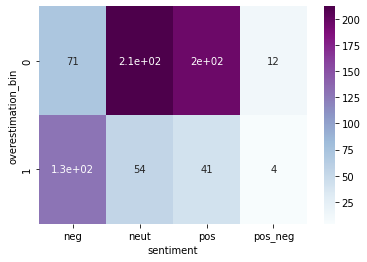

In [34]:
# heatmap co-occurrence overestimation - sentiment
sns.heatmap(comat_overestimation_sentiment1, cmap="BuPu", annot=True)

In [35]:
# co-occurrence matrix overestimation - sentiment rounded percentages
comat_overestimation_sentiment = pd.crosstab(df.overestimation_bin, df.sentiment, normalize='index')
comat_o_v_rounded = comat_overestimation_sentiment.round(2)
comat_o_v_rounded

sentiment,neg,neut,pos,pos_neg
overestimation_bin,,,,
0,0.14,0.43,0.40,0.02
1,0.57,0.24,0.18,0.02


<AxesSubplot:xlabel='sentiment', ylabel='overestimation_bin'>

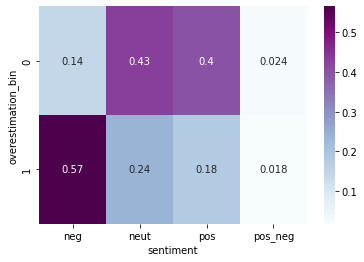

In [36]:
# heatmap co-occurrence overestimation - sentiment rounded percentages
sns.heatmap(comat_overestimation_sentiment, cmap="BuPu", annot=True)